![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)

# Ecuaciones no Lineales - Tercera Parte

***

**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*

### Búsqueda de raíces en ecuaciones no lineales
___

Problema a resolver: Hallar $p$ tal que $f(p)=0,$ $p  \in [a,b].$



### Método Newton-Raphson
___
Partiendo del método de la Regula-Falsi, en vez de trazar una cuerda entre los dos extremos del intervalo, se propone trazar una tangente, que pase por un punto. Supongamos que para el intervalo $[a, b]$ trazamos la tangente $f(x)$ que pasa por $f(b)$:
La ecuación de la recta tangente será:

$$t(x) = f'(b)(x - b) + f(b)$$

Cuando se cumpla que $f(x) = 0$ se deberá cumplir que $t(x) = 0$. Por lo tanto podríamos hallar un valor $x_1$ tal que $t(x_1) = 0$ para ir aproximando nuestra raíz. Así obtenemos:

$$ t(x_1) = 0 = f'(b)(x_1 - b) + f(b) $$

$$ x_1 = b - \frac{f(b)}{f'(b)} $$

Si $f(x_1) \ne 0$, podemos repetir el procedimiento otra vez para obtener un $x_2$. En definitiva, podemos crear una aproximación iterativa de la siguiente forma:

$$ x_{k+1}=x_k-\frac{f(x_k)}{f'(x_k)}$$



In [1]:
import numpy as np #librería para operaciones algebraicas y numéricas
import pandas as pd #librería para manejo de datos

#programo el método Newton Raphson
def Newton_Raphson(x0 , tol, itmax = 100): 
        df = pd.DataFrame(columns=('xcero','xuno'))
        x0 = x0 
        contador = 0  
        x1 = x0-f(x0)/fd(x0)
        while (contador < itmax) and (abs((x1 - x0) / x1) > tol):
            df.loc[contador] = [x0,x1]
            x0 = x1                                                 
            x1 = x0-f(x0)/fd(x0)                 
            contador += 1                      
        print('El método de Newton Raphson convergió en',contador,'iteraciones')
        return df


### Ejemplo usando Newton Raphson
___
Hallar $p$ tal que $f(p)=0,$ $p  \in [0,4]$ siendo :
$$f(x)=(x+e^\frac{x}{2}).cos(x)+5$$

Aplico el método **Newton Raphson** con un valor inicial $x_0$=2.

In [2]:
#defino el valor inicial y la tolerancia
import sympy as sp #librería para manejo simbólico de ecuaciones

X0=2
tolerancia=10**(-15)

#Primero trabajamos con la función simbólicamente para que calcule la derivada
x = sp.symbols('x')
y = (x+sp.exp(x/2))*sp.cos(x)+5 #Acá hay que escribor la función a analizar. OJO que sympy es un poco distinto a numpy
yd = sp.diff(y,x) #Calcula la derivada simbólica

#Con el comando "sp.lambdify" pasamos a que evalúe numéricamente
f=sp.lambdify(x,y)
fd=sp.lambdify(x,yd)

ejemplo=Newton_Raphson(X0, tolerancia)


El método de Newton Raphson convergió en 4 iteraciones


In [3]:
from IPython.display import display, Math
import sympy.printing as printing

xcero = ejemplo.xcero
xuno = ejemplo.xuno

print ("Analicemos las primeras iteraciones. \n")  

for p in range (4):
    print ("Iteración "+str(p)+": ")
    ec = "x_"+str(p)+"= "+str(xcero[p])+"\;y\; x_"+str(p+1)+"=x_"+str(p)+"-\\frac{f(x_"+str(p)+")}{f'(x_"+str(p)+")}"+"= "+str(xuno[p])
    display(Math(printing.latex(ec,mul_symbol='dot')))

Analicemos las primeras iteraciones. 

Iteración 0: 


<IPython.core.display.Math object>

Iteración 1: 


<IPython.core.display.Math object>

Iteración 2: 


<IPython.core.display.Math object>

Iteración 3: 


<IPython.core.display.Math object>

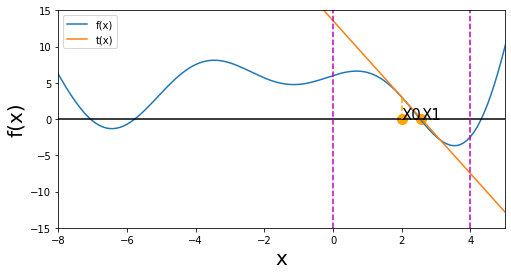

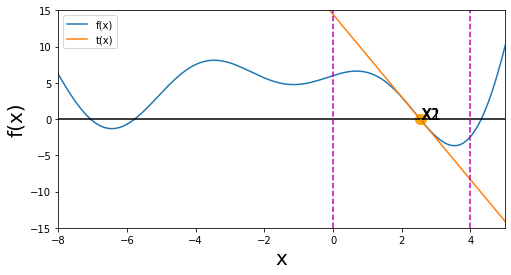

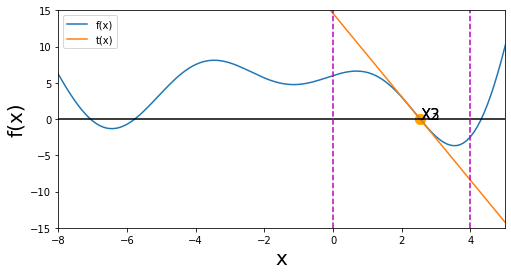

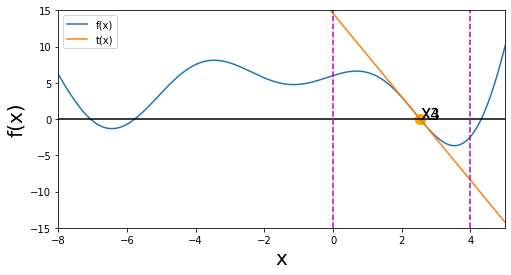

In [4]:
import matplotlib.pyplot as plt
ejex = np.arange(-10, 10, 0.1);
y = f(ejex)
    
for p in range (4):
    def t(x):#definimos la recta tangente
        return fd(xcero[p])*(x - xcero[p]) + f(xcero[p])
    fig = plt.figure(figsize=(8,4))
    plt.plot(ejex, y)
    plt.xlabel('x',fontsize=20)
    plt.xlim(-8,5)
    plt.ylim(-15,15)
    plt.ylabel('f(x)',fontsize=20)
    plt.plot(ejex, t(ejex))
    plt.axhline(y=0, color='k')   
    plt.scatter(x=xcero[p], y=0, marker="o", c='orange', s=100)
    plt.annotate("X"+str(p), (xcero[p], 0),fontsize=15)
    plt.plot([xcero[p],xcero[p]], [0,t(xcero[p])], color='orange',linestyle='dashed')
    plt.scatter(x=xuno[p], y=0, marker="o", c='orange', s=100)
    plt.annotate("X"+str(p+1), (xuno[p], 0),fontsize=15)
    plt.legend(['f(x)','t(x)'],fontsize=10)
    plt.axvline(x=0, color='m',linestyle='dashed') 
    plt.axvline(x=4, color='m',linestyle='dashed'); 

In [5]:
print('Resumen de resultados para Newton Raphson:')
print('A continuación se muestran las primeras iteraciones:')
ejemplo.columns= ['Xi','Xi+1']
ejemplo.head(10)

Resumen de resultados para Newton Raphson:
A continuación se muestran las primeras iteraciones:


,Xi,Xi+1
0,2.000000,2.575960
1,2.575960,2.534624
2,2.534624,2.534823
3,2.534823,2.534823


### Propuesta de ejercicio
___
Hallar $p$ tal que $f(p)=0,$ $p  \in [0,4]$ siendo :
$$f(x)=(x+e^\frac{x}{2}).cos(x)+5$$

Aplico el método **Newton Raphson** con un valor inicial $x_0$=0.
¿Encuentra la raíz?¿Qué particularidad se observa en este caso?¿A qué se debe?

### Método de la Secante
___
El método de Newton Raphson es muy bueno, pero puede ocurrir que no sea tan sencillo conocer la derivada, entonces la aproximemos numéricamente:

$$f'(b) = \frac{f(b)-f(a)}{b-a}$$

De esta forma, en vez de aproximar con la recta tangente, trazamos la cuerda:

$$ c(x_1) = 0 = \frac{f(b)-f(a)}{b-a}(x_1 - b) + f(b) $$

Si reemplazamos en la fórmula de NR obtenemos :

$$ x_1 = b - f(b) \frac{(b-a)}{f(b)-f(a)} $$

Si $f(x_1) \ne 0$, podemos repetir el procedimiento otra vez para obtener un $x_2$. En definitiva, podemos crear una aproximación iterativa de la siguiente forma:

$$ x_{k+1}=x_k-f(x_k)\frac{x_k-x_{k-1}}{f(x_k)-f(x_{k-1})}$$



In [6]:
import numpy as np #librería para operaciones algebraicas y numéricas
import pandas as pd #librería para manejo de datos

#programo el método Secante
def secante(a , b, tol, itmax = 100): 
        np.seterr('raise')
        df2 = pd.DataFrame(columns=('xcero','xuno','xdos'))
        x0 = a
        x1 = b
        contador = 0  
        x2 = x1-f(x1)*(x1-x0)/(f(x1)-f(x0))
        while (contador < itmax) and (abs((x1 - x0) / x1) > tol):
            df2.loc[contador] = [x0,x1,x2]
            x0 = x1                                                 
            x1 = x2
            x2 = x1-(f(x1)*(x1-x0))/(f(x1)-f(x0))
            contador += 1                      
        print('El método Secante convergió en',contador,'iteraciones')
        return df2

In [7]:
#defino el valor inicial y la tolerancia

tolerancia=10**(-10)
A=0
B=4

ejemplo2=secante(0,4, tolerancia)


El método Secante convergió en 9 iteraciones


In [8]:
from IPython.display import display, Math
import sympy.printing as printing

xcero2 = ejemplo2.xcero
xuno2 = ejemplo2.xuno
xdos2 = ejemplo2.xdos

print ("Analicemos las primeras iteraciones. \n")  

for p in range (4):
    print ("Iteración "+str(p)+": ")
    ec = "Trazo\;la\;cuerda\;con\; x_"+str(p)+"= "+str(xcero2[p])+"\;y\; x_"+str(p+1)+"= "+str(xuno2[p])+"\;obtengo\;la\;raíz\; x_"+str(p+2)+"= x_"+str(p+1)+"- f(x_"+str(p)+")\\frac{(x_"+str(p+1)+"-x_"+str(p)+")}{f(x_"+str(p+1)+")-f(x_"+str(p)+")}= "+str(xdos2[p])
    display(Math(printing.latex(ec,mul_symbol='dot')))

Analicemos las primeras iteraciones. 

Iteración 0: 


<IPython.core.display.Math object>

Iteración 1: 


<IPython.core.display.Math object>

Iteración 2: 


<IPython.core.display.Math object>

Iteración 3: 


<IPython.core.display.Math object>

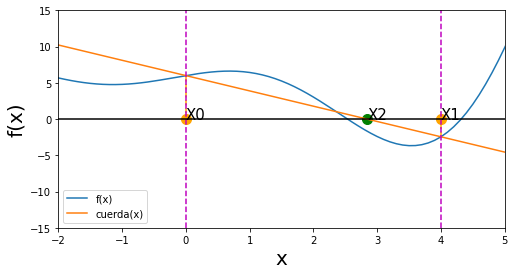

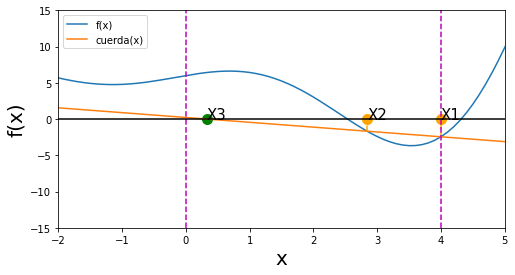

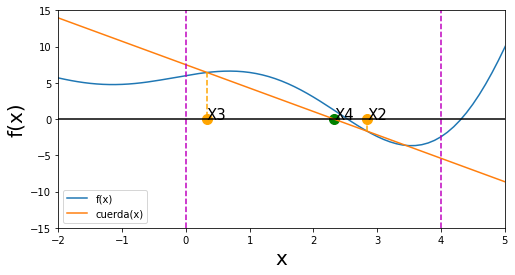

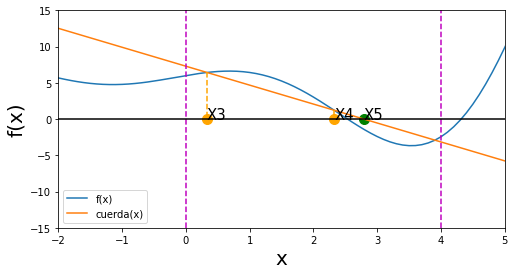

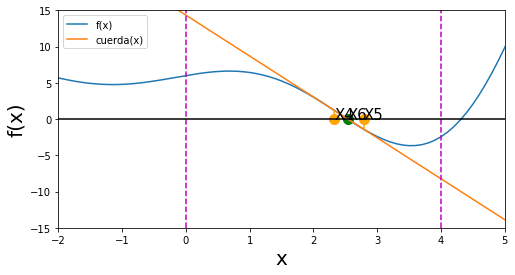

In [9]:
from matplotlib import pyplot as plt

ejex = np.arange(-5, 10, 0.1)
y = f(ejex)
    
for p in range (5):
    def cuerda(x):#definimos la recta tangente
        return (f(xuno2[p])-f(xcero2[p]))*(x-xuno2[p])/(xuno2[p]-xcero2[p])+f(xuno2[p])
    
    #def c(x):#definimos la cuerda
     #   return ((xuno2[p]-xcero2[p])/(f(xuno2[p])-f(xcero2[p]))*(x - xcero2[p]) + f(xcero2[p])
    plt.figure(figsize=(8,4))
    plt.plot(ejex, y)
    plt.xlabel('x',fontsize=20)
    plt.xlim(-2,5)
    plt.ylim(-15,15)
    plt.ylabel('f(x)',fontsize=20)
    plt.plot(ejex, cuerda(ejex))
    plt.scatter(x=xcero2[p], y=0, marker="o", c='orange', s=100)
    plt.annotate("X"+str(p), (xcero2[p], 0),fontsize=15)
    plt.plot([xcero2[p],xcero2[p]], [f(xcero2[p]),0], color='orange',linestyle='dashed')
    plt.scatter(x=xuno2[p], y=0, marker="o", c='orange', s=100)
    plt.annotate("X"+str(p+1), (xuno2[p], 0),fontsize=15)
    plt.plot([xuno2[p],xuno2[p]], [f(xuno2[p]),0], color='orange',linestyle='dashed')
    plt.scatter(x=xdos2[p], y=0, marker="o", c='green', s=100)
    plt.annotate("X"+str(p+2), (xdos2[p], 0),fontsize=15)
    plt.legend(['f(x)','cuerda(x)'],fontsize=10)
    plt.axvline(x=0, color='m',linestyle='dashed') 
    plt.axvline(x=4, color='m',linestyle='dashed')
    plt.axhline(y=0, color='k')  ; 

In [10]:
print('Resumen de resultados para Secante:')
print('A continuación se muestran las primeras iteraciones:')
ejemplo2.columns= ['X-i','Xi','Xi+1']
ejemplo2.head(10)

Resumen de resultados para Secante:
A continuación se muestran las primeras iteraciones:


,X-i,Xi,Xi+1
0,0.000000,4.000000,2.842126
1,4.000000,2.842126,0.331700
2,2.842126,0.331700,2.323827
3,0.331700,2.323827,2.792809
4,2.323827,2.792809,2.540887
5,2.792809,2.540887,2.534557
6,2.540887,2.534557,2.534823
7,2.534557,2.534823,2.534823
8,2.534823,2.534823,2.534823


![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)



# GRACIAS POR SU ATENCIÓN



### Ecuaciones no Lineales - Tercera Parte

***

**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*